# **Лабораторная работа №11 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **Решение уравнения теплопроводности**

#### В общем виде одномерное уравнение параболическое уравнение с граничными условиями первого рода и начальными условиями задается системой:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} = \frac{\partial}{\partial x}( u \cdot \frac{\partial u}{\partial x}) , \:\:\: 0 \leq t \leq 1, \:\:\: 0 < x < 1
    \\
    u(x, 0) = \varphi(x), \:\:\: 0 < x < X
    \\
    u(0, t) = \psi_{0}(t), \:\:\: 0 < t \leq T
    \\
    u(X, t) = \psi_{X}(t), \:\:\: 0 < t \leq T
 \end{cases}
\end{equation*}
$$

Данную задачу называют так же первой начально-краевой задачей для уравнения теплопроводности.

#### Преобразуем одномерное параболическое урпвнение:

$$
\begin{equation*}
    \frac{\partial u}{\partial t} = \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial u}{\partial x}
\end{equation*}
$$

#### Нанесем на пространственно-временную область $0 \leq x \leq X, 0 \leq t \leq T$ конечно-разностную сетку $\omega_{h \tau}$:

$$
\begin{equation*}
    \omega_{h \tau}=\left\{x_m = mh, \: m = \overline{0, M}; \:\:\: t^{k}=k\tau, k = \overline{0, K} \right\}
\end{equation*}
$$

Аппроксмириуем дифференциальные операторы отношением конечых разностей:

$$
\begin{gathered}
\left.\frac{\partial u}{\partial t}\right|_{m} ^{k}=\frac{u_{m}^{k+1}-u_{m}^{k}}{\tau}+O(\tau) \\
\left.\frac{\partial u}{\partial x}\right|_{m} ^{k}=\frac{u_{m + 1}^{k}-u_{m}^{k}}{h}+O(h) \\
\left.\frac{\partial^{2} u}{\partial x^{2}}\right|_{m} ^{k}=\frac{u_{m+1}^{k}-2 u_{m}^{k}+u_{m-1}^{k}}{h^{2}}+O\left(h^{2}\right) .
\end{gathered}
$$

#### Подставляем и выражаем $u_{m}^{k + 1}$:

$$
\begin{equation*}
    \frac{u_{m}^{k+1}-u_{m}^{k}}{\tau} = \frac{u_{m + 1}^{k}-u_{m}^{k}}{h} + \frac{u_{m+1}^{k}-2 u_{m}^{k}+u_{m-1}^{k}}{h^{2}}
\end{equation*}
$$

$$
\begin{equation*}
    u_{m}^{k+1} = \tau \cdot( u_{m+1}^{k}(\frac{1}{h^{2}} + \frac{1}{h}) + u_{m}^{k}(\frac{1}{\tau} - \frac{2}{h^{2}} - \frac{1}{h}) + u_{m-1}^{k} \frac{1}{h^{2}})
\end{equation*}
$$

Решим задачу из учебника Демченко:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} = \frac{\partial}{\partial x}( u \cdot \frac{\partial u}{\partial x}) , \:\:\: 0 \leq t \leq 1, \:\:\: 0 < x < 1
    \\
    u(x, 0) = (1 + x)^{2}, \:\:\: 0 \leq x \leq 1
    \\
    u(0, t) = \frac{1}{7 - 6 \cdot t}, \:\:\: 0 < t \leq 1
    \\
    u(1, t) = \frac{4}{7 - 6 \cdot t}, \:\:\: 0 < t \leq 1
 \end{cases}
\end{equation*}
$$

In [189]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [190]:
tau = 0.005
h = 0.005

T = X = 1

x_steps = int(X / h)
t_steps = int(T / tau)

eps = 1e-5

In [191]:
def phi(x):
    return (1 + x) ** 2

def psi_0(t):
    return 1 / (7 - 6*t)

def psi_X(t):
    return 4 / (7 - 6*t)

In [198]:
def init_grid(averrgs, cur_t_layer, prev_t_layer):
  size = x_steps - 2
  matr = np.zeros((size, size), dtype = float)

  for i in range(size):
    matr[i][i] = - (averrgs[i + 1] + averrgs[i]) / h**2 - 1 / tau 
    
    if i > 0:
      matr[i][i - 1] = averrgs[i] / h**2
    if i < N - 1:
      matr[i][i + 1] = averrgs[i + 1] / h**2

  f = np.array([-prev_t_layer[i + 1] / tau for i in range(size)])
  
  f[0] = f[0] - averrgs[0] * cur_t_layer[0] / h**2
  f[-1] = f[-1] - averrgs[-1] * cur_t_layer[-1] / h**2

  sol = np.linalg.solve(matr, f)
  u = cur_t_layer.copy()
  
  for i in range(size):
    u[i + 1] = sol[i]

  return u

In [193]:
def solve_eq(cur_t_layer, prev_t_layer):
    averrgs = np.array([(prev_t_layer[T - 1] + prev_t_layer[t]) / 2 for t in range(1, len(prev_t_layer))])
    u = prev_t_layer

    is_greater = True

    while is_greater:
        data = init_grid(averrgs, cur_t_layer, prev_t_layer)

        averrgs = np.array([(u[t + 1] + (data[t + 1] - u[t + 1]) + 
                             u[t] + (data[t] - u[t])) / 2 
                             for t in range(len(prev_t_layer) - 1)])

        accuracy = np.linalg.norm(data - u)
        is_greater = accuracy > eps
        u = data
    
    return data

def plot(u):
    x = np.arange(start=0, stop=X, step=h)
    t = np.arange(start=0, stop=T, step=tau)
    
    x, t = np.meshgrid(x, t)

    fig = plt.figure(figsize=(16, 16))
    graph = plt.axes(projection='3d')

    surf = graph.plot_surface(x, t, u, cmap=cm.plasma)
    graph.set_xlabel("x", fontsize=20)
    graph.set_ylabel("t", fontsize=20)

    graph.set_zlabel("u(x, t)", fontsize=20)

    fig.colorbar(surf, shrink=0.5)

    plt.grid()
    plt.show()


def plot_t(u):
    x = np.arange(start=0, stop=X, step=h)
    plt.figure(figsize=[12, 8])
    plt.grid()
    plt.ylabel('u')
    plt.xlabel('x')
    plt.plot(x, u)
    plt.show()

In [194]:
def init():
    x = np.arange(start=0, stop=X, step=h)
    t = np.arange(start=0, stop=T, step=tau)

    u = np.zeros((x_steps, t_steps), dtype = float)

    for x_i in range(x_steps):
        u[0][x_i] = phi(x[x_i])
    
    for t_i in range(t_steps):
        u[t_i][0] = psi_0(t[t_i])
        u[t_i][-1] = psi_X(t[t_i])

    return u

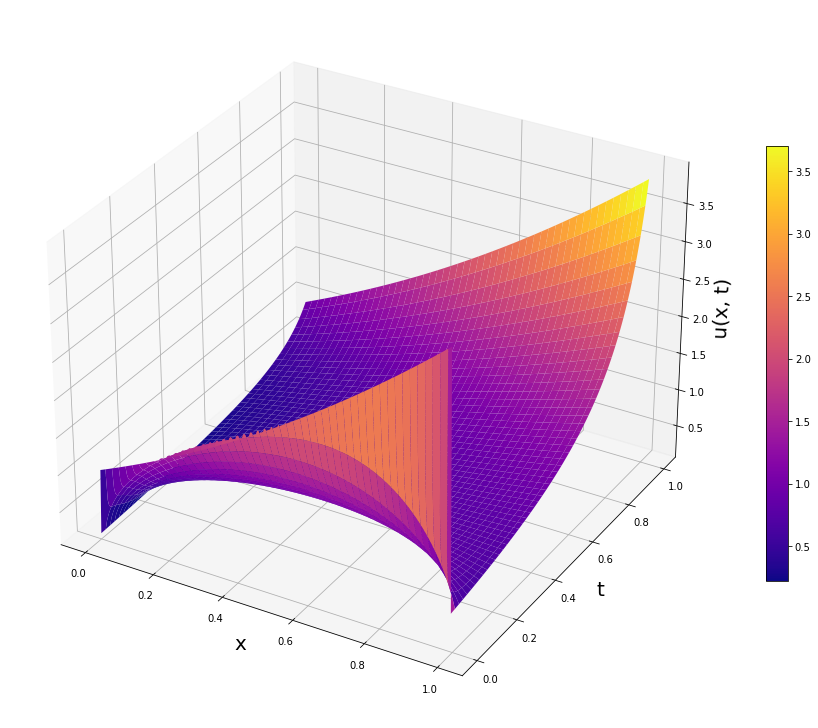

In [195]:
u = init()

for t_lay in range(1, t_steps):
    u[t_lay] = solve_eq(u[t_lay], u[t_lay - 1])

plot(u)

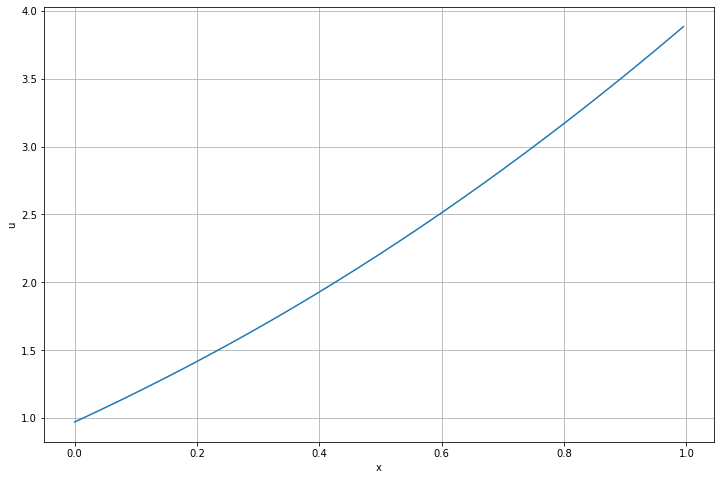

[0.97087379 1.16438328 1.36977717 1.58842526 1.82110188 2.06825432
 2.33014606 2.60693168 2.89869829 3.20549277 3.52734858 3.86432803]


In [196]:
plot_t(u[t_steps - 1])
print(u[t_steps - 1, ::int(((X) / h) / 11)])